# BLACK FRIDAY SALE


## IMPORT AND LOAD THE DATA

In [1]:
import pandas as pd

blacks_sale = pd.read_csv(r"dataset\Black Sale\train.csv")
blacks_sale_test = pd.read_csv(r"dataset\Black Sale\test.csv")

In [2]:
blacks_sale_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## CHECK THE NULL OR NOT

In [3]:
blacks_sale[blacks_sale.isna().any(axis=1)].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


## MEAN INSTEAD OF NAN USING FILLNA()

In [4]:
blacks_sale.Product_Category_2.fillna(blacks_sale.Product_Category_2.mean(),inplace=True)
blacks_sale_test.Product_Category_2.fillna(blacks_sale_test.Product_Category_2.mean(),inplace=True)

In [5]:
blacks_sale.Product_Category_3.fillna(blacks_sale.Product_Category_3.mean(),inplace=True)
blacks_sale_test.Product_Category_3.fillna(blacks_sale_test.Product_Category_3.mean(),inplace=True)

## STRING ENCODE NUMBER USING LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

blacks_sale.City_Category=encode.fit_transform(blacks_sale.City_Category)
blacks_sale.Age=encode.fit_transform(blacks_sale.Age)
blacks_sale.Gender=encode.fit_transform(blacks_sale.Gender)
blacks_sale.Marital_Status=encode.fit_transform(blacks_sale.Marital_Status)

blacks_sale_test.City_Category=encode.fit_transform(blacks_sale_test.City_Category)
blacks_sale_test.Age=encode.fit_transform(blacks_sale_test.Age)
blacks_sale_test.Gender=encode.fit_transform(blacks_sale_test.Gender)
blacks_sale_test.Marital_Status=encode.fit_transform(blacks_sale_test.Marital_Status)


## CONVERT INTO ALL INTEGER AFTER LabelEncoder

In [7]:
blacks_sale.Gender = blacks_sale.Gender.astype('int32') 
blacks_sale.Marital_Status = blacks_sale.Marital_Status.astype("int32")
blacks_sale.City_Category = blacks_sale.City_Category.astype("int32")
blacks_sale.Product_Category_2 = blacks_sale.Product_Category_2.astype("int32")
blacks_sale.Product_Category_3 = blacks_sale.Product_Category_3.astype("int32")

blacks_sale_test.Gender = blacks_sale_test.Gender.astype('int32') 
blacks_sale_test.Marital_Status = blacks_sale_test.Marital_Status.astype("int32")
blacks_sale_test.City_Category = blacks_sale_test.City_Category.astype("int32")
blacks_sale_test.Product_Category_2 = blacks_sale_test.Product_Category_2.astype("int32")
blacks_sale_test.Product_Category_3 = blacks_sale_test.Product_Category_3.astype("int32")

In [8]:
blacks_sale.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Replace "4+" With "4" Before Convert Into Integer

In [9]:
blacks_sale['Stay_In_Current_City_Years']=blacks_sale['Stay_In_Current_City_Years'].replace("4+","4",)
blacks_sale_test['Stay_In_Current_City_Years']=blacks_sale_test['Stay_In_Current_City_Years'].replace("4+","4",)

In [10]:
blacks_sale[blacks_sale['Stay_In_Current_City_Years']=='4+']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


## Convert Str Into Integer

In [11]:
blacks_sale.Stay_In_Current_City_Years = pd.to_numeric(blacks_sale.Stay_In_Current_City_Years)

In [17]:
blacks_sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9,12,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9,12,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,12,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9,12,7969


In [19]:
blacks_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int32 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(6), int64(5), object(1)
memory usage: 37.8+ MB


## Data Visualization 

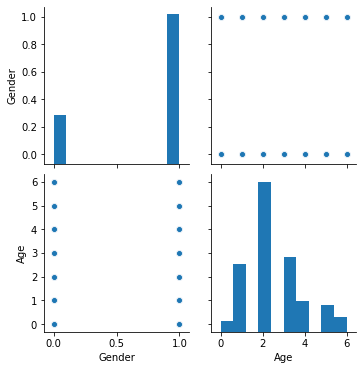

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(blacks_sale, vars = ['Gender', 'Age'] )

plt.show()

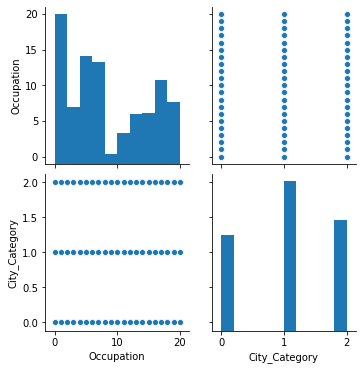

In [16]:
sns.pairplot(blacks_sale, vars = [ 'Occupation', 'City_Category'] )

plt.show()

## Train The Model

In [13]:
X = blacks_sale.drop(['User_ID','Product_ID','Purchase'],axis=1).values
y = blacks_sale.Purchase.values

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
pred = model.predict(X)
from sklearn.metrics import mean_squared_error , confusion_matrix

mean_squared_error(y,pred)

5303086.5541763